In [1]:
import matplotlib.pyplot as plt
from utils import Logger
from pathlib import Path
import numpy as np

In [21]:
i = 0
recent_logfn = []
for fn in Path('./').iterdir():
    if fn.suffix == '.pkl':
        recent_logfn.append(fn)
recent_logfn

[PosixPath('2019-02-14 14:23:11-no-enc-base-mr-longer.pkl'),
 PosixPath('2019-02-15 15:24:14-enc-base-mr-encthresholds_1.5-1.9-longer.pkl'),
 PosixPath('2019-02-17 21:08:05-no-enc-base-mr-2.pkl'),
 PosixPath('2019-02-12 10:06:52-enc-base-mr-alwaysupdate.pkl'),
 PosixPath('2019-02-18 03:59:18-enc-base-mr-encthresholds_1.5-1.9-2.pkl'),
 PosixPath('2019-02-12 11:38:50-enc-base-mr-encthresholds_1.5-1.9.pkl'),
 PosixPath('2019-02-11 23:43:08-no-enc-base-mr-101itr.pkl')]

2019-02-17 21:08:05-no-enc-base-mr-2.pkl
Average  density_loss 2.114166e-09
Average  policy_actor_loss -0.036195207
Average  policy_critic_loss 0.8142143
Average  internal_rewards 0.0003232563
Average  external_rewards 0.0
2019-02-18 03:59:18-enc-base-mr-encthresholds_1.5-1.9-2.pkl
Average  density_loss 2.5164544e-09
Average  policy_actor_loss -0.054344762
Average  policy_critic_loss 0.03254342
Average  encoder_loss 1.6945207
Average  internal_rewards 0.00031640686
Average  external_rewards 5.816476215847106e-05


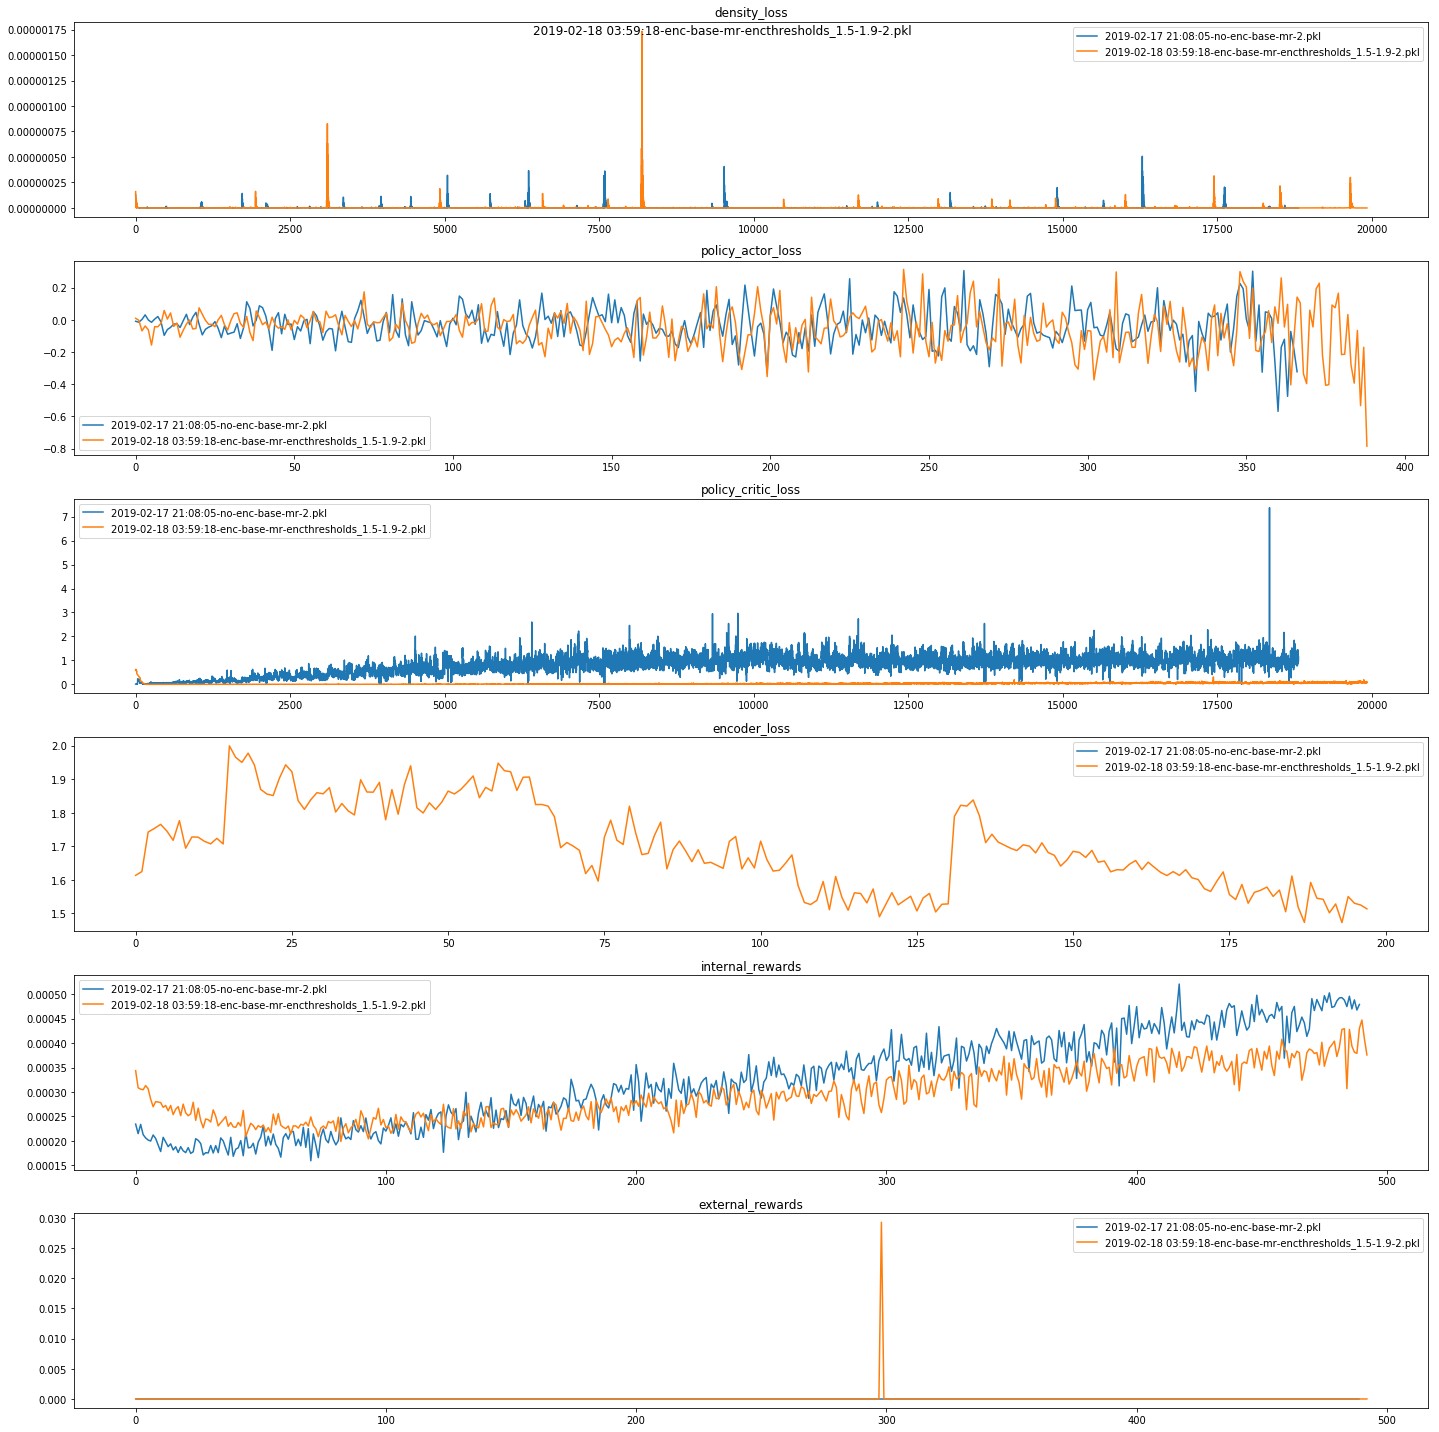

In [29]:
lgr = Logger(max_size=10000)
fig, axs = plt.subplots(6, 1)
fig.set_figheight(20)
fig.set_figwidth(20)

tmp_lgs = [recent_logfn[2], recent_logfn[4]]
titles = ['density_loss', 'policy_actor_loss', 'policy_critic_loss', 'encoder_loss', 'internal_rewards', 'external_rewards']
fn = tmp_lgs[i%len(tmp_lgs)]
for fn in tmp_lgs:
    print(fn)
    lgr.import_logs(str(fn))
    logs = [lgr.logs['density']['loss'], 
            lgr.logs['policy']['actor_loss'], 
            lgr.logs['policy']['critic_loss'], 
            lgr.logs['encoder']['loss'],
            lgr.logs['env']['int_rewards'],
            lgr.logs['env']['ext_rewards']]
    for title, log, ax in zip(titles, logs, axs):
        if title in ['internal_rewards', 'external_rewards']: 
            init_log = []
            for l in log:
                if np.array(l).shape == (): init_log.append(l)
                else: init_log.append(np.mean(l))
            log = init_log
        elif title in ['policy_actor_loss', 'internal_rewards', 'external_rewards', 'encoder_loss']: 
            init_log = []
            for l in log:
                if np.array(l).shape == (): init_log.append(l)
                else: init_log = np.concatenate((init_log, l))
            new_log = []
            bs = 50 if title == 'policy_actor_loss' else 200
            for i in range(0, len(init_log), bs):
                new_log.append(np.mean(init_log[i:i+bs]))
            log = new_log
        
        if len(log) > 0: 
            print("Average ", title, np.mean(np.array(log)))
        ax.plot(log[10:],label=str(fn))
        ax.set_title(title)

for ax in axs: ax.legend()
fig.tight_layout()
fig.suptitle('{}'.format(fn))
plt.show()
i+=1

2019-02-14 14:23:11-no-enc-base-mr-longer.pkl
Average  density_loss 2.5148656e-09
Average  policy_actor_loss -0.022578837
Average  policy_critic_loss 0.30666
Average  running_normalized_internal_rewards 0.032357972
Average  external_rewards 0.0
2019-02-15 15:24:14-enc-base-mr-encthresholds_1.5-1.9-longer.pkl
Average  density_loss 1.903368e-09
Average  policy_actor_loss -0.020103907
Average  policy_critic_loss 0.025793694
Average  encoder_loss 1.7579528
Average  running_normalized_internal_rewards -0.056401815
Average  external_rewards 4.1044786840056264e-07


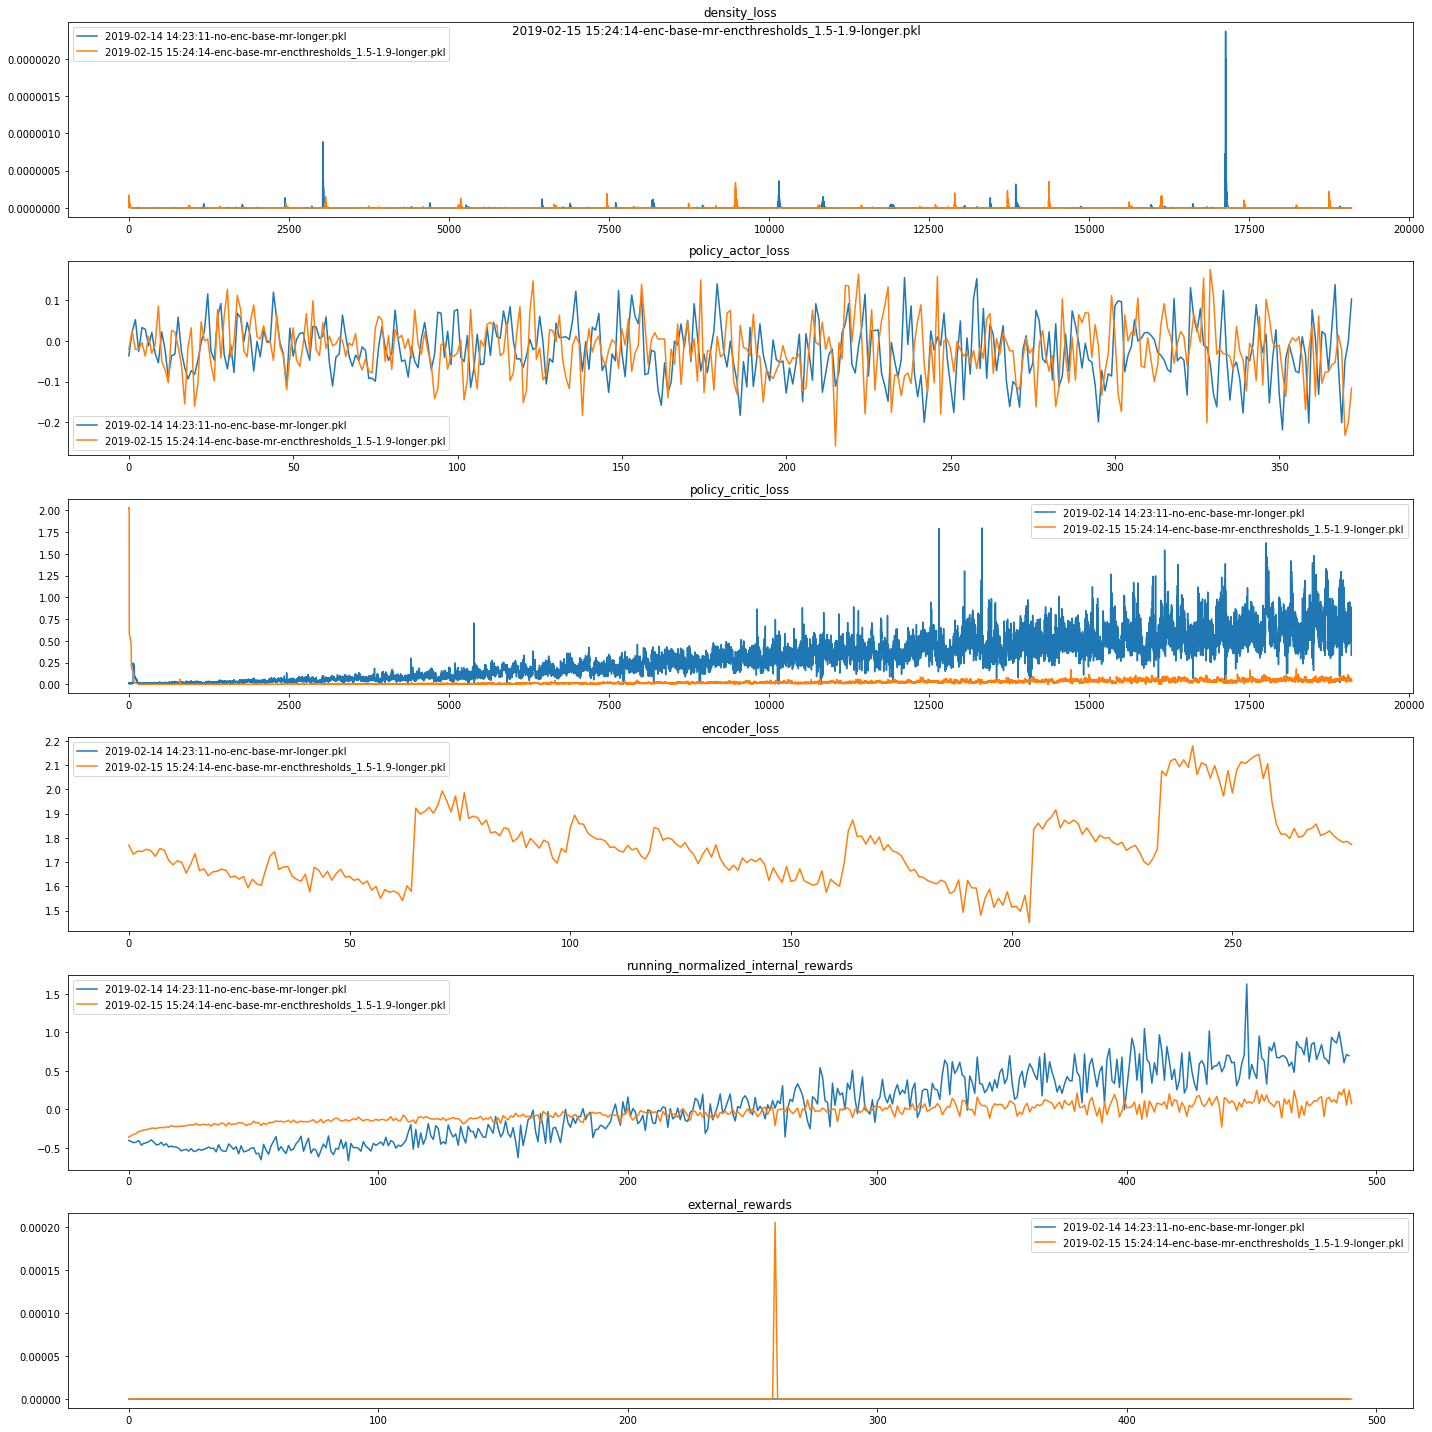

In [28]:
lgr = Logger(max_size=10000)
fig, axs = plt.subplots(6, 1)
fig.set_figheight(20)
fig.set_figwidth(20)

tmp_lgs = [recent_logfn[0], recent_logfn[1]]
titles = ['density_loss', 'policy_actor_loss', 'policy_critic_loss', 'encoder_loss', 'running_normalized_internal_rewards', 'external_rewards']
fn = tmp_lgs[i%len(tmp_lgs)]
for fn in tmp_lgs:
    print(fn)
    lgr.import_logs(str(fn))
    logs = [lgr.logs['density']['loss'], 
            lgr.logs['policy']['actor_loss'], 
            lgr.logs['policy']['critic_loss'], 
            lgr.logs['encoder']['loss'],
            lgr.logs['env']['int_rewards'],
            lgr.logs['env']['ext_rewards']]
    for title, log, ax in zip(titles, logs, axs):
        if title in ['running_normalized_internal_rewards', 'external_rewards']: 
            init_log = []
            for l in log:
                if np.array(l).shape == (): init_log.append(l)
                else: init_log.append(np.mean(l))
            log = init_log
        elif title in ['policy_actor_loss', 'encoder_loss']: 
            init_log = []
            for l in log:
                if np.array(l).shape == (): init_log.append(l)
                else: init_log = np.concatenate((init_log, l))
            new_log = []
            bs = 50 if title == 'policy_actor_loss' else 200
            for i in range(0, len(init_log), bs):
                new_log.append(np.mean(init_log[i:i+bs]))
            log = new_log
        if len(log) > 0: 
            print("Average ", title, np.mean(np.array(log)))
        ax.plot(log[10:],label=str(fn))
        ax.set_title(title)

for ax in axs: ax.legend()
fig.tight_layout()
fig.suptitle('{}'.format(fn))
plt.show()
i+=1